In [1]:
#Import dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
#Create dataframe
df = pd.read_excel('/Users/bbaidya/q3/AirQuality.xlsx')
#Display & examine some data
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


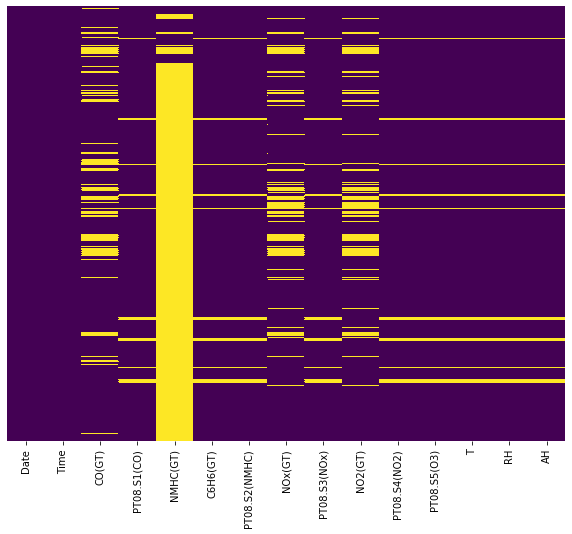

In [9]:
df.replace(to_replace= -200, value= np.NaN, inplace= True)
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
df.drop(['NMHC(GT)'], axis= 1, inplace= True)

(9357, 14)

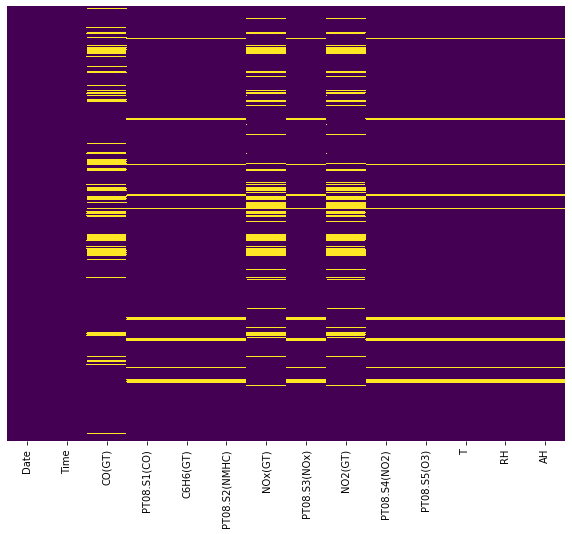

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
df.shape

In [12]:
df["CO(GT)"] = df.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NOx(GT)"] = df.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
df["NO2(GT)"] = df.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

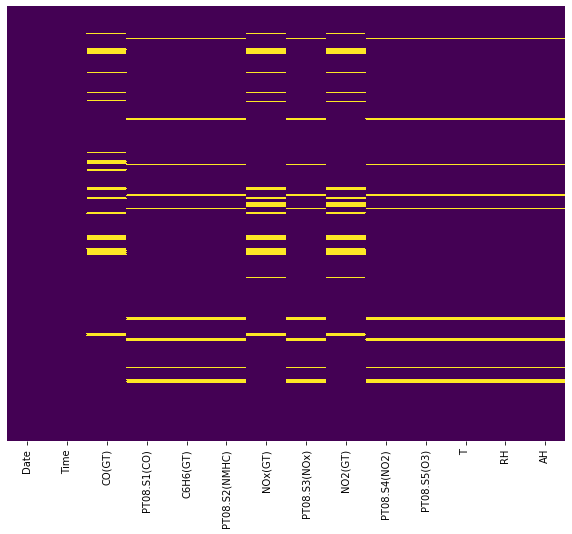

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df.fillna(method='ffill', inplace= True)

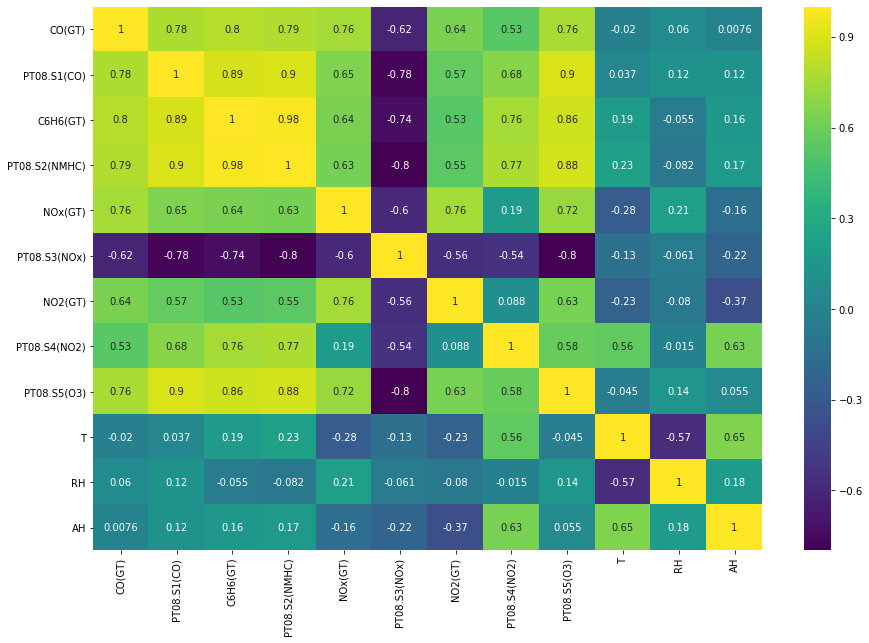

In [15]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

# Gardient Descent

In [16]:
x = df['PT08.S1(CO)']
y = df['CO(GT)']

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8

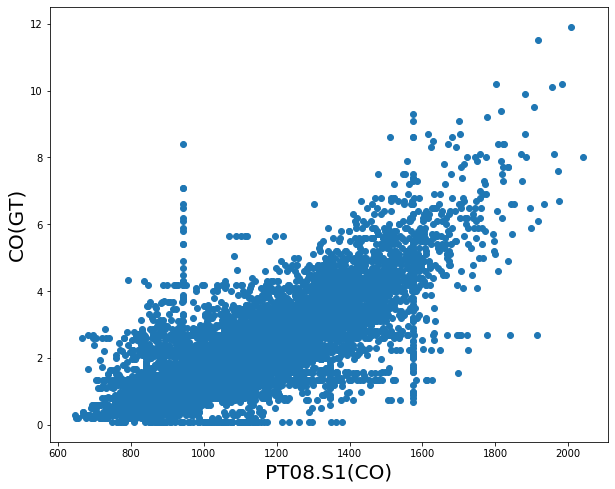

In [18]:
plt.scatter(x,y)
plt.xlabel('PT08.S1(CO)', size = 20)
plt.ylabel('CO(GT)', size = 20)
plt.show()

In [19]:
x = (x - x.mean())/x.std()
y = (y - y.mean())/y.std()

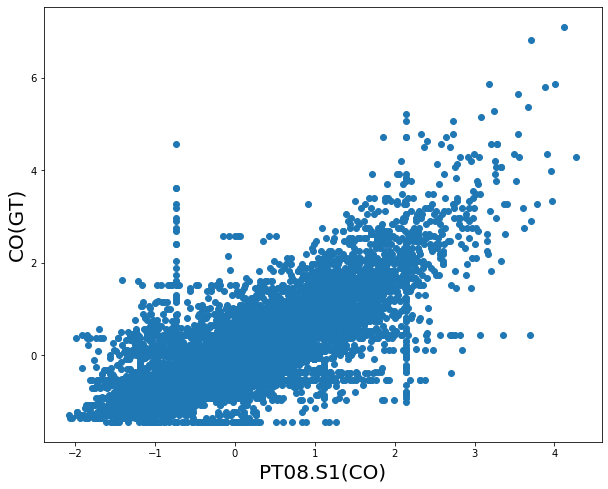

In [21]:
plt.scatter(x,y)
plt.xlabel('PT08.S1(CO)', size = 20)
plt.ylabel('CO(GT)', size = 20)
plt.show()

In [22]:
x = np.c_[np.ones(x.shape[0]),x]

In [23]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)  
theta = np.random.rand(2)  #initializing theta with some random values

In [24]:
def gradient_descent(x, y, m, theta,  alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y          
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False
        
        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [25]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [26]:
print("Values of theta are {:2f} and {:2f}".format(theta[0], theta[1]))

Values of theta are 0.002250 and 0.779599


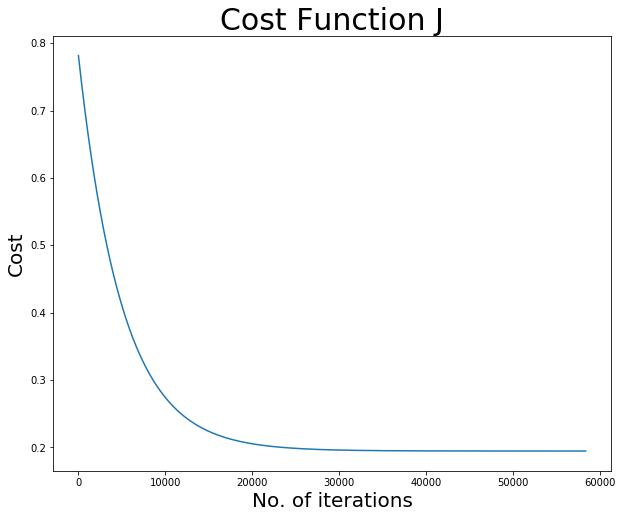

In [27]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [41]:
r2 = 1 - (sum((y - prediction_list[-1])**2)) / (sum((y - y.mean())**2))

In [82]:
print('Mean Square Error using equation of hyperplane : {}'.format(round(r2,3)))

Mean Square Error using equation of hyperplane : 0.668


# Multivariate Gradient Descent

In [83]:
from sklearn import preprocessing

In [84]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
y = preprocessing.scale(df['CO(GT)'])

In [85]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

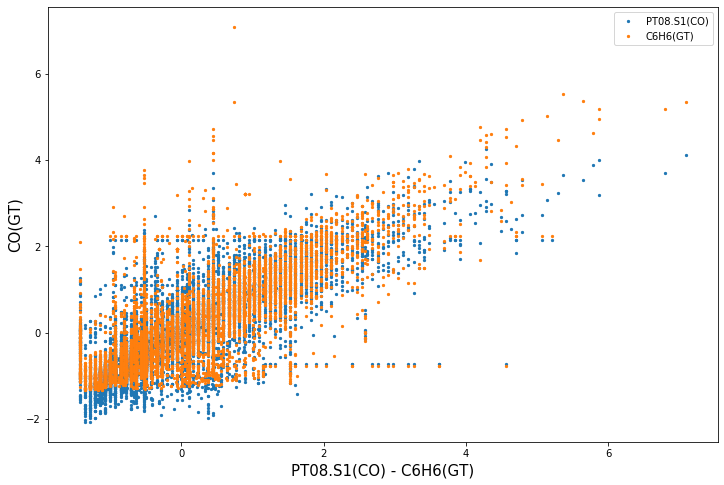

In [86]:
plt.scatter(y, x_1, s=5, label = 'PT08.S1(CO)')
plt.scatter(y, x_2, s=5, label = 'C6H6(GT)')
plt.legend(fontsize=15)
plt.xlabel('PT08.S1(CO) - C6H6(GT)', fontsize=15)
plt.ylabel('CO(GT)', fontsize=15)
plt.legend()
plt.show()

In [87]:
x = np.c_[np.ones(x_1.shape[0]),x_1, x_2]

In [88]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(3)  #initializing theta with some random values

In [89]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [90]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

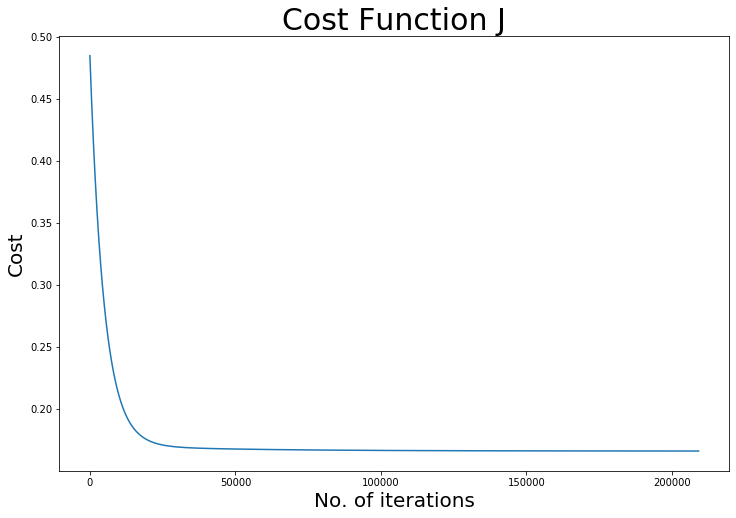

In [91]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [92]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2]

In [93]:
MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.332
Mean Square Error from Gradient Descent prediction : 0.332


# Adding 3rd Variable

In [43]:
df.columns

Index(['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH'],
      dtype='object')

In [46]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
y = preprocessing.scale(df['CO(GT)'])

In [47]:
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

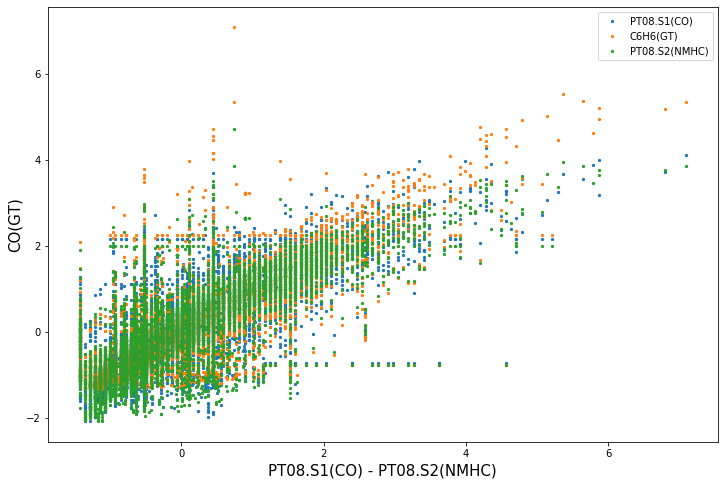

In [48]:
plt.scatter(y, x_1, s=5, label = 'PT08.S1(CO)')
plt.scatter(y, x_2, s=5, label = 'C6H6(GT)')
plt.scatter(y, x_3, s=5, label = 'PT08.S2(NMHC)')
plt.legend(fontsize=15)
plt.xlabel('PT08.S1(CO) - PT08.S2(NMHC)', fontsize=15)
plt.ylabel('CO(GT)', fontsize=15)
plt.legend()
plt.show()

In [53]:
x = np.c_[np.ones(x_1.shape[0]),x_1, x_2, x_3]

In [54]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(4)  #initializing theta with some random values

In [55]:
def gradient_descent(x, y, m, theta, alpha):
    cost_list = []   #to record all cost values to this list
    theta_list = []  #to record all theta_0 and theta_1 values to this list 
    prediction_list = []
    run = True
    cost_list.append(1e10)    #we append some large value to the cost list
    i=0
    while run:
        prediction = np.dot(x, theta)   #predicted y values theta_0*x0+theta_1*x1
        prediction_list.append(prediction)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)   #  (1/2m)*sum[(error)^2]
        cost_list.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error))   # alpha * (1/m) * sum[error*x]
        theta_list.append(theta)
        if cost_list[i]-cost_list[i+1] < 1e-9:   #checking if the change in cost function is less than 10^(-9)
            run = False

        i+=1
    cost_list.pop(0)   # Remove the large number we added in the begining 
    return prediction_list, cost_list, theta_list

In [56]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

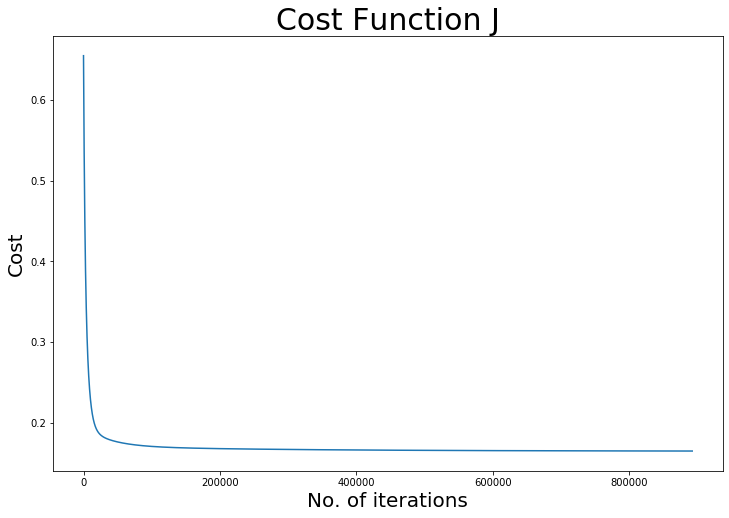

In [57]:
plt.title('Cost Function J', size = 30)
plt.xlabel('No. of iterations', size=20)
plt.ylabel('Cost', size=20)
plt.plot(cost_list)
plt.show()

In [58]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2] + theta[3]*x[:,3]

In [59]:
MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.33
Mean Square Error from Gradient Descent prediction : 0.33


# Adding 4th Variable

In [60]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
x_4 = preprocessing.scale(df['NOx(GT)'])
y = preprocessing.scale(df['CO(GT)'])

In [61]:
x = np.c_[np.ones(x_1.shape[0]),x_1, x_2, x_3, x_4]

In [64]:
# Parameters required for Gradient Descent
alpha = 0.0001   #learning rate
m = y.size  #no. of samples
np.random.seed(10)
theta = np.random.rand(5)  #initializing theta with some random values

In [65]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [66]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2] + theta[3]*x[:,3]+ theta[4]*x[:,4]

MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.248
Mean Square Error from Gradient Descent prediction : 0.248


# Adding 5th Variable

In [68]:
x_1 = preprocessing.scale(df['PT08.S1(CO)'])
x_2 = preprocessing.scale(df['C6H6(GT)'])
x_3 = preprocessing.scale(df['PT08.S2(NMHC)'])
x_4 = preprocessing.scale(df['NOx(GT)'])
x_5 = preprocessing.scale(df['PT08.S3(NOx)'])
y = preprocessing.scale(df['CO(GT)'])

x = np.c_[np.ones(x_1.shape[0]),x_1, x_2, x_3, x_4, x_5]
theta = np.random.rand(6) 

In [69]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [70]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2] + theta[3]*x[:,3] + theta[4]*x[:,4] + theta[5]*x[:,5]

MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.242
Mean Square Error from Gradient Descent prediction : 0.242


# Adding 6th variable

In [71]:
x_6 = preprocessing.scale(df['NO2(GT)'])

x = np.c_[np.ones(x_1.shape[0]),x_1, x_2, x_3, x_4, x_5, x_6]
theta = np.random.rand(7)

In [72]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [73]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2] + theta[3]*x[:,3] + theta[4]*x[:,4] + theta[5]*x[:,5] + theta[6]*x[:,6]

MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.237
Mean Square Error from Gradient Descent prediction : 0.237


# Adding 7th variable

In [78]:
# 'PT08.S5(O3)
x_7 = preprocessing.scale(df['PT08.S4(NO2)'])

x = np.c_[np.ones(x_1.shape[0]),x_1, x_2, x_3, x_4, x_5, x_6, x_7]
theta = np.random.rand(8)

In [75]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [76]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2] + theta[3]*x[:,3] + theta[4]*x[:,4] + theta[5]*x[:,5] + theta[6]*x[:,6] + theta[7]*x[:,7] 

MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.225
Mean Square Error from Gradient Descent prediction : 0.225


# Adding 8th variable

In [79]:
x_8 = preprocessing.scale(df['PT08.S5(O3)'])

x = np.c_[np.ones(x_1.shape[0]),x_1, x_2, x_3, x_4, x_5, x_6, x_7, x_8]
theta = np.random.rand(9)

In [80]:
prediction_list, cost_list, theta_list = gradient_descent(x, y, m, theta, alpha)
theta = theta_list[-1]

In [81]:
yp = theta[0] +theta[1]*x[:,1] + theta[2]*x[:,2] + theta[3]*x[:,3] + theta[4]*x[:,4] + theta[5]*x[:,5]
+ theta[6]*x[:,6] + theta[7]*x[:,7] + theta[8]*x[:,8] 

MSE_equ = ((yp-y)**2).mean()  #Using yp from equation of hyperplane
MSE_GD = ((prediction_list[-1]-y)**2).mean()  #From Gradient Descent


print('Mean Square Error using equation of hyperplane : {}'.format(round(MSE_equ,3)))
print('Mean Square Error from Gradient Descent prediction : {}'.format(round(MSE_GD,3)))

Mean Square Error using equation of hyperplane : 0.27
Mean Square Error from Gradient Descent prediction : 0.225
